<a href="https://colab.research.google.com/github/gayathry2612/experiments/blob/master/Data_Science_Test_Cases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementation of the article on Medium with minor additions

[How to do testing in Data Science? ](https://towardsdatascience.com/unit-testing-for-data-scientists-dc5e0cd397fb)
* Author : Martin Grootendorst https://www.linkedin.com/in/mgrootendorst/
* Tester : Gayathry Dasika https://www.linkedin.com/in/gayathrydasika/


# UNIT TESTING
* As Data Science becomes more of a staple in large organizations, the need for proper testing of code slowly becomes more integrated into the skillset of a Data Scientist.

* Imagine you have been creating a pipeline for predicting customer churn in your organization. A few months after deploying your solution, there are new variables that might improve its performance.


* Unfortunately, after adding those variables, the code suddenly stops working! You are not familiar with the error message and you are having trouble finding your mistake. This is where testing, and specifically unit testing, comes in!

* Writing tests for specific modules improves the stability of your code and makes mistakes easier to spot. Especially when working on large projects, having proper tests is essentially a basic need.

# Why would you test your code?
Although this seems like a no-brainer, there are actually many reasons for testing your code:
* Prevent unexpected output
* Simplifies updating code
* Increases overall efficiency of developing code
* Helps to detect edge cases
* And most importantly prevents you from pushing any broken code into production!

And more reasons : 

Even for those who do write production code, it is important to write tests for at least the most important modules of their code.

# `What if you run a deep learning pipeline and fails after 3 hours on something you could have easily tested?`

Lets see how to do basic unit-testing in Data Science pipelines. 

* For example, if you would want to test the sum function in python, you could write the following test:

In [2]:
assert sum([1, 2, 3]) == 6

* Extend this example by creating a custom sum function and testing it for tuples and lists:

Unit tests are great for catching bugs, but will not capture everything as tests are prone to the same logical errors as the code you are trying to test for.


In [3]:
def new_sum(iterable):
    result = 0
    for val in iterable:
        result += val
    return result

def test_new_sum_list():
    assert new_sum([1, 2, 3]) == 6
    
def test_new_sum_tuple():
    assert new_sum((-1, 2, 3)) == 6
    
if __name__ == "__main__":
    test_new_sum_list()
    test_new_sum_tuple()

AssertionError: ignored

Ideally, you would want to include integration tests, code reviews, formal verification, etc. More after Pytest

# Pytest

**The issue with the example above is that it will stop running the first time it faces an AssertionError.** 

Ideally, we want to see an overview of all tests that pass or fail.

---


This is where test runners, such as Pytest, come in. Pytest is a great tool for creating extensive diagnoses based on the tests that you have defined.
We start by installing Pytest:
## `pip install pytest`
After doing so, create a `test_new_sum.py` file and fill it with the following code:


In [6]:
# test_new_sum.py

def new_sum(iterable):
    result = 0
    for val in iterable:
        result += val
    return result

def test_new_sum_list():
    assert new_sum([1, 2, 3]) == 6
    
def test_new_sum_tuple():
    assert new_sum((-1, 2, 3)) == 6

Next, on the terminal go to the tests folder where test_new_sum.py is stored and run the following command `pytest -v` . It will show on the terminal whether the tests passed or failed


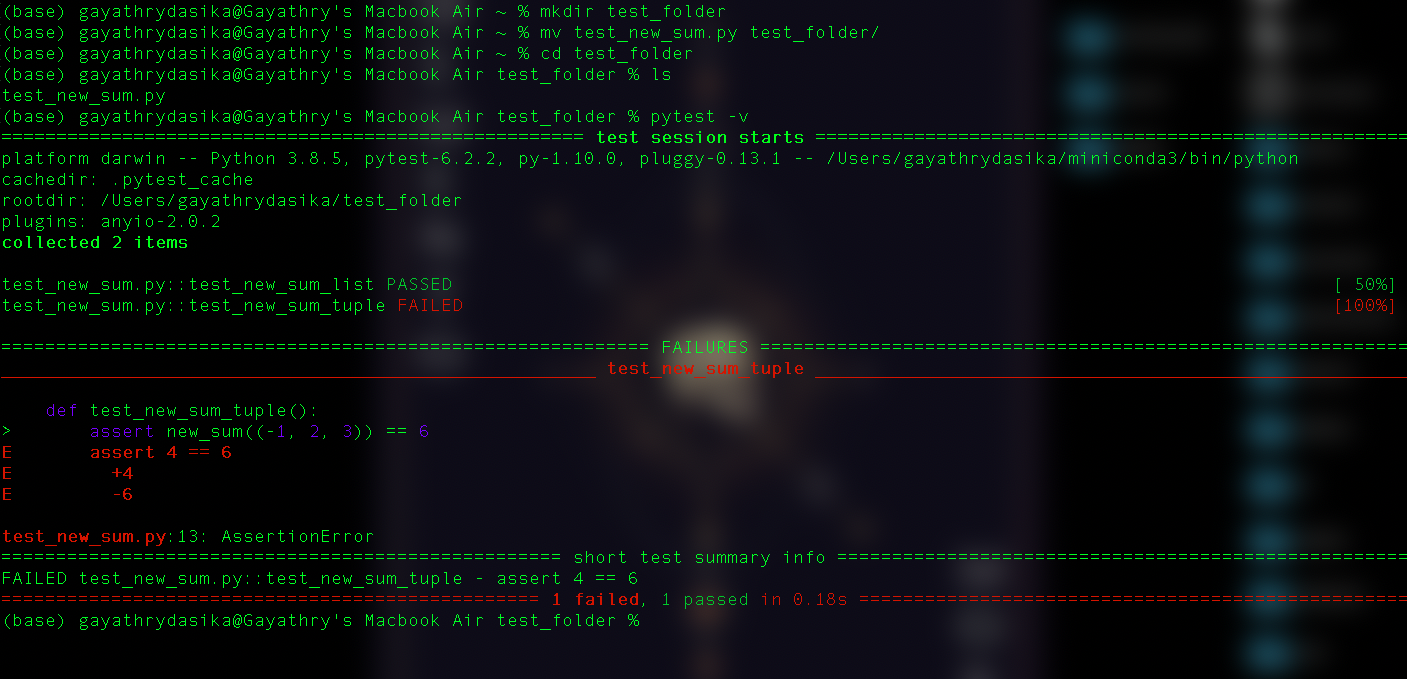


# Unit testing in Data Science 
Take an example data frame for this purpose. 
In an actual scenario, you will pick a part of your validation set / to test the assumptions. 

In [10]:
# Example df 
import pandas as pd
df = pd.DataFrame(data=[[1,2,3,4,5,0],[4,5,6,None,8,0],[7,8,9,10,11,1],[11,None,13,14,15,1]], columns=["Col1","Col2","Col3","Col4","Col5","Label"])
df

,Col1,Col2,Col3,Col4,Col5,Label
0,1,2.0,3,4.0,5,0
1,4,5.0,6,NaN,8,0
2,7,8.0,9,10.0,11,1
3,11,NaN,13,14.0,15,1


a few simple preprocessing functions. We want to know the average value of each feature per class. 
* To do that, we created the following basic function, aggregate_mean:
* To test aggregate_mean, we write a test case to test the outputs of aggregate mean 

In [22]:
# Aggregate mean function
def aggregate_mean(df, column):
    return df.groupby("Label")[column].mean().to_dict()


# Code including a Test case for aggregate mean
import pandas as pd

def load_data():
    df = pd.DataFrame(data=[[1,2,3,4,5,0],
                            [4,5,6,None,8,0],
                            [7,8,9,10,11,1],
                            [11,None,13,14,15,1]], 
                      columns=["Col1","Col2","Col3",
                               "Col4","Col5","Label"])

    return df

def aggregate_mean(df, column):
    return df.groupby("Label")[column].mean().to_dict()

def test_aggregate_mean_col_1():   
    data = load_data()
    expected = {0: 2.5, 1: 9.0}
    result = aggregate_mean(data, "col_1")
    assert expected == result


# Parametrize
Run multiple test cases with Parametrize
If we want to test for many different scenarios it would cumbersome to create many duplicates of a test. To prevent that, we can use Pytest’s parametrize function.
Parameterize extends a test function by allowing us to test for multiple scenarios. We simply add the parametrize decorator and state the different scenarios.
For example, if we want to test the aggregate_mean function for features 1 and 3, we adopt the code as follows:

In [26]:
import pytest
@pytest.mark.parametrize("column, expected", [("Col1", {0: 2.5, 1: 9}), ("Col3", {0: 4, 1: 5.5})])
def test_aggregate_mean_col_1(column, expected):   
    data = load_data()
    result = aggregate_mean(data, column)
    assert expected == result

In [28]:
test_aggregate_mean_feature_1("Col3",{0:5,1:7})

AssertionError: ignored

# Fixtures
# **`Prevent repeating code in your unit tests with Fixtures`**

* When creating these test cases we often want to run some code before every test case. Instead of repeating the same code in every test, we create fixtures that establish a baseline code for our tests.

* They are often used to initialize database connections, load data, or instantiate classes. Using the previous example, we would like to turn `load_data()` into a fixture. 

* We change its name to `data()` in order to better represent the fixture. Then, `@pytest.fixture(scope='module')` is added to the function as a decorator. Finally, we add the fixture as a parameter to the unit test:

Advantage of fixture : 
* As you can see, there is no need to set data() to a variable since it is automatically evoked and stored in the input parameter (in the name space).

## `Fixtures are a great way to increase readability and reduce the chance of any errors in the test functions.`

In [29]:
# Using fixtures
import pandas as pd
import pytest 

@pytest.fixture(scope='module')
def data():
    df = pd.DataFrame(data=[[1,2,3,4,5,0],
                            [4,5,6,None,8,0],
                            [7,8,9,10,11,1],
                            [11,None,13,14,15,1]], 
                      columns=["Col1","Col2","Col3",
                               "Col4","Col5","Label"])

    return df


def aggregate_mean(df, column):
    return df.groupby("Label")[column].mean().to_dict()


@pytest.mark.parametrize("column, expected", [("Col1", {0: 2.5, 1: 9}), ("Col3", {0: 3, 1: 4})])
def test_aggregate_mean_feature_1(data, column, expected):   
    assert expected == aggregate_mean(data, column)

# MOCKING 
Useful when you are trying to read a very large dataset and you don't know if that will work later. 

Imitate code in your pipeline to speed up testing with Mocking


In many data-driven solutions, you will have large files to work with which can slow down your pipeline tremendously. Creating tests for these pieces of code is difficult as fast tests are preferred.

Example : You are trying to read a very large csv ~ 2GB into the model. You want to test if the pipeline works. You implement a method called Mocking. 



In [31]:
# Codebase.py
import pandas as pd

def aggregate_mean(df, column):
    return df.groupby("Label")[column].mean().to_dict()

def pipeline(column):
    data = pd.read_csv("SOME_VERY_LARGE_FILE.csv")
    data = aggregate_mean(data, column)
    return data

Now, to test whether this pipeline works as intended, we want to use a smaller dataset so we can more accurately test cases. To do so, we patch the pd.read_csv with the smaller dataset that we have been using thus far:


When we run `pytest -v`, the large .csv will not be loaded and instead replaced with our small dataset. The test runs quickly and we can easily test new cases!



In [36]:
# Unittest.py stored in test_cases folder 

import pandas as pd
from unittest.mock import patch
# from codebase import pipeline

@patch('pd.read_csv') # it will be codebase.pd.read_csv 
def test_aggregate_mean_feature_1(read_csv):   
    read_csv.return_value = pd.DataFrame(data=[
                            [1,2,3,4,5,0],
                            [4,5,6,None,8,0],
                            [7,8,9,10,11,1],
                            [11,None,13,14,15,1]], 
                      columns=["Col1","Col2","Col3",
                               "Col4","Col5","Label"])
    
    result = pipeline("Col1")
    assert result == {0: 2.5, 1: 9}

# Coverage

Unit testing is not a perfect method by any means, but knowing how much of your code you are testing is extremely helpful. Especially when you have complicated pipelines, it would be nice to know if your tests cover most of your code.

For this purpose install `pytest-cov`

# `pip install pytest-cov`

In [38]:
#After installing pytest-cov, run the following command on the terminal

$pytest --cov=codebase

Full documentation : https://pytest-cov.readthedocs.io/en/latest/


# [Integration Tests ](https://towardsdatascience.com/rethinking-continuous-integration-for-data-science-ebf0dfc61788)

Data projects ultimate objective is to impact business, but this impact is really hard to assess during development. How much impact a dashboard will have? What about the impact of a predictive model? If the product is not yet in production, it is hard to estimate business impact and we have to resort to proxy metrics: for decision-making tools, business stakeholders might subjectively judge how much a new dashboard can help them improve their decisions, for a predictive model, we could come up with a rough estimate based on model’s performance.

This causes the tool (e.g. a dashboard or model) to be perceived as the unique valuable piece in the data pipeline, because it is what the proxy metric acts upon. In consequence, most time and effort is done in trying to improve this final deliverable, while all the previous intermediate steps get less attention.

If the project is taken to production, depending on the overall code quality, the team might have to refactor a lot of the codebase to be production-ready. This refactoring can range from doing small improvements to a complete overhaul, the more changes the project goes through, the harder will be to reproduce original results. All of this can severely delay or put launch at 
risk.

A better approach is to always keep our code deploy-ready (or almost) at anytime. This calls for a workflow that ensures our code is tested and results are always reproducible. This concept is called Continuous Integration and is a widely adopted practice in software engineering. This blog post introduces an adapted CI procedure that can be effectively applied in data projects with existing open source tools.


## Guidelines for testing 
1. Structure your pipeline in several tasks, each one saving intermediate results to disk
2. Implement your pipeline in such a way that you can parametrize it
3. The first parameter should sample raw data to allow quick end-to-end runs for testing
4. A second parameter should change artifacts location to separate testing and production environments
5. On every push, the CI service runs unit tests that verify logic inside each task
6. The pipeline is then executed with a data sample and integration tests verify integrity of intermediate results

The 6 steps are discussed in this notebook using pytest module. 

# Continuous Integration 

The article : https://towardsdatascience.com/rethinking-continuous-integration-for-data-science-ebf0dfc61788

Covers integration tests in good detail. 